<img style="float: left;" src="Practical1/Slide1.JPG" width="100%">

<div style="font-size: 25px">
1. We perform an experiment on $CO_2$ in a closed container (V = const) with the following steps:
</div>

<div style="font-size: 20px">
(1)	The experiment starts at T = 10°C and p = 100 bars.
</div>
<div style="font-size: 20px">
(2)	We differentially (changing volume only, no heat introduction) drop the pressure in container down to p = 1 bar. 
</div>
<div style="font-size: 20px">
(3)	Next, keeping the same T, we increase p up to 100 bars again.
</div>
<div style="font-size: 20px">
(4)	We differentially heat container (no volume change) up to T = $10°C$ again. 
</div>

<div style="font-size: 20px">
Describe all states of $CO_2$ at each stage of the experiment. Describe also the assumptions you made in order to choose a particular connection path. Use the diagram and report (approximate) changes in p and T connected with the state of $CO_2$ during each stage of experiment. Are we going to arrive to the same state by the end of the experiment? Explain why. 
</div>


<img style="float: left;" src="Practical1/P1.png" width="100%">

<div style="font-size: 25px">
2. Looking at the steam tables for water we found the following points for the Sublimation and Vaporazation curves, respectively. Using the data in the table, please finish the following questions:
</div>

<div style="font-size: 20px">
(1) Verify graphically that Antoine equation with the parameters given below is a good fit within the intended region for the vaporization curve. 
$\begin{equation}
log_{10}(p_i^{sat})=A-\frac{B}{C+T}
\end{equation}$

<div style="font-size: 20px">
Units: p-pressure, mmHg;

     T-temperature, °C, range [1,100];
     
     A = 8.071; B = 1730.63; C = 233.43 

In [1]:
# load the data which we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# 1) sublimation and vaporization curve, units in the table: T-Kelvin, P-mmHg
data_sub = pd.read_excel(r'Practical1/data.xlsx', sheet_name='Sublimation Curve')
data_vap = pd.read_excel(r'Practical1/data.xlsx', sheet_name='Vaporization Curve')

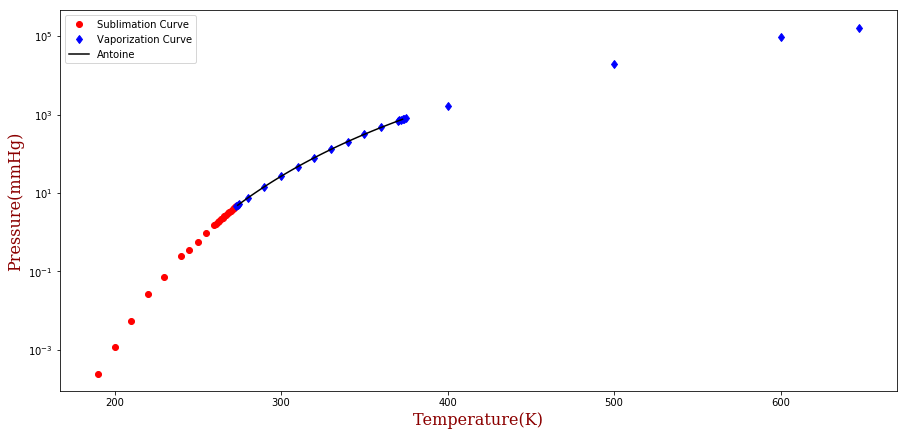

In [2]:
# 2) using Antoine equation to check
A = 8.071
B = 1730.63
C = 233.43
T = np.linspace(1, 100, 100)
P = 10**(A-B/(C+T))

plt.figure(figsize=(15, 7))
plt.semilogy(data_sub['T'], data_sub['P'], 'ro')
plt.semilogy(data_vap['T'], data_vap['P'], 'bd')

plt.semilogy(T+273, P, 'k')
plt.legend(['Sublimation Curve','Vaporization Curve','Antoine'])
plt.xlabel('Temperature(K)', fontdict=font)
plt.ylabel('Pressure(mmHg)', fontdict=font)
plt.show()

<div style="font-size: 20px">
(2) Fit the sublimation curve using a power function of the form $y$ = $Dx^E$ . Where $y$ is the pressure, $x$ is the  temperature and $D$ and $E$ constants to be determined in the fitting. 

Final fitting parameters [-146.10750839   26.34155418]


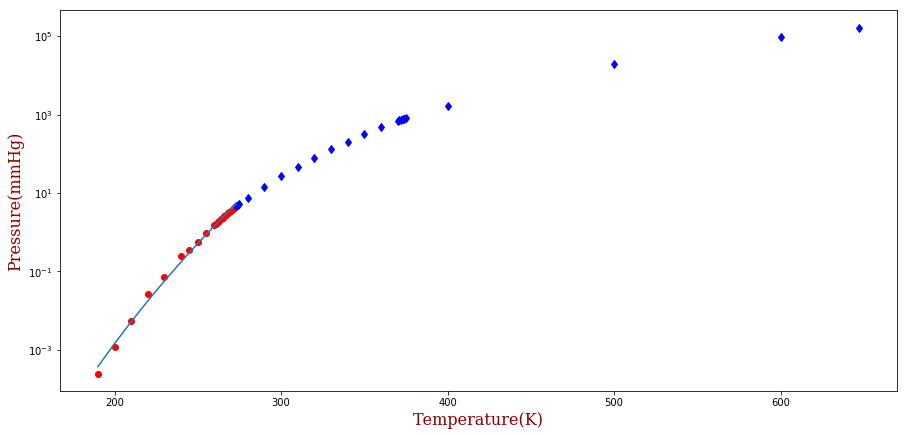

In [3]:
# Here we use Least Squares approach we have learned from the previous course to fit the data
# At first we need to tranform the power function to linear function. ln(D) + E*ln(x) = ln(y)
# transient flow 
P_sub = data_sub['P']
T_sub = data_sub['T']

num_coef = 2
num_points = len(P_sub)

M = np.ones((num_points, num_coef))

for ii in range(num_points):
    M[ii, 0] = 1
    M[ii, 1] = np.log(T_sub[ii])
    

rhs = np.zeros((num_points,))
rhs[:] = np.log(P_sub)


# Solve linear system:
solution = np.linalg.solve(np.dot(M.T, M), np.dot(M.T, rhs))
print('Final fitting parameters',solution)

D = np.exp(solution[0])
E = solution[1]

# create fitting sublimation curve
P_fit = D*T_sub**E

plt.figure(figsize=(15, 7))
plt.semilogy(data_sub['T'], data_sub['P'], 'ro')
plt.semilogy(data_vap['T'], data_vap['P'], 'bd')
plt.semilogy(T_sub, P_fit)

plt.xlabel('Temperature(K)', fontdict=font)
plt.ylabel('Pressure(mmHg)', fontdict=font)
plt.show()

<div style="font-size: 20px">
(3) Finally, determine the triple point of water in $°C$ and $mPa$.( $x °C$ = (273.15 + $x$)$K$; 1$ mmHg$ = 133.32$Pa$)

In [4]:
# We need to find the intersection point between sublimation curve and vaporization curve
# We already know how to use Bisection and Newton approaches to find the solutions. In this case we use bisection

# objective function
def fobj(T):
    sub_curve = D*T**E
    vap_curve = 10**(A-B/(C+T-273.15))
    diff = sub_curve - vap_curve
    return diff


# x = np.linspace(250,350,50)
# fval = fobj(x)
# print(fval)
# plt.plot(x, fval)
    
# bisection approach
a = 250   # left boundary
b = 350   # right boundary
tol = 1e-7
itern = 0
# bisection method
b1 = a
b2 = b
while True:
    mid_point = (b1+b2)/2
    if fobj(mid_point)*fobj(b1)<0:
        b2=mid_point
    else:
        b1=mid_point
    
    itern = itern + 1
        
    if abs(fobj(mid_point))<tol:
        break
        
c = (b1+b2)/2



print('After %i iterations, the triple point of water is found: T = %0.2f K, P = %0.2f mmHg'%(itern,c, 10**(A - B /(c + C - 273.15))))

After 25 iterations, the triple point of water is found: T = 266.15 K, P = 2.68 mmHg


<div style="font-size: 25px">
3. Please plot the P-T diagram for pure water component. You can use the sublimation and vaporization curves (analytical curve) you already get in the previous questions. The fusion curve is given below:  

$T$ = 273.1$(1-(p-p_t)/m)^n$

</div>

<div style="font-size: 20px">
Units: p-pressure, mmHg;

     pt-pressure at the triple point, mmHg;

     T-temperature, K;
     
     m = 1.88e8; n = 0.194 

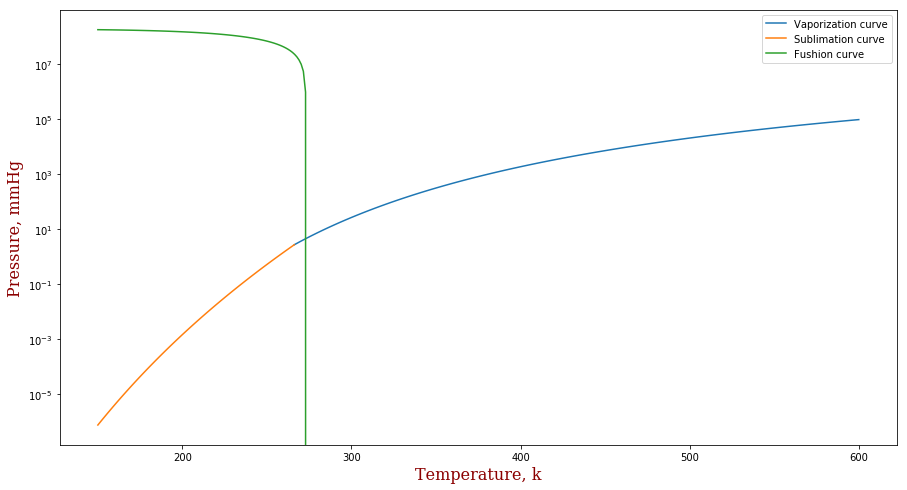

In [5]:
Tt = np.linspace(150,600,100)   # unit: K
index = 0
m = 1.88e8
n = 0.194
# find the triple point

Tv = np.linspace(266.15,600,100)   # unit: K
Ts = np.linspace(150,266.15,100)   # unit: K
Tf = np.linspace(150,278,100)   # unit: K

Pv = 10**(A-B/(C+Tv-273.15))
Ps = D*Ts**E
Pf = 2.68 + m*(1-(Tf/273.1)**(1/n))

plt.figure(figsize=(15, 8))
plt.semilogy(Tv, Pv)
plt.semilogy(Ts, Ps)
plt.semilogy(Tf, Pf)
plt.legend(['Vaporization curve', 'Sublimation curve', 'Fushion curve'])
plt.xlabel('Temperature, k', fontdict=font)
plt.ylabel('Pressure, mmHg', fontdict=font)
plt.show()
    